<a href="https://colab.research.google.com/github/Kishankumar1328/Data-Analysis-FreeCodeCamp/blob/main/Time_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

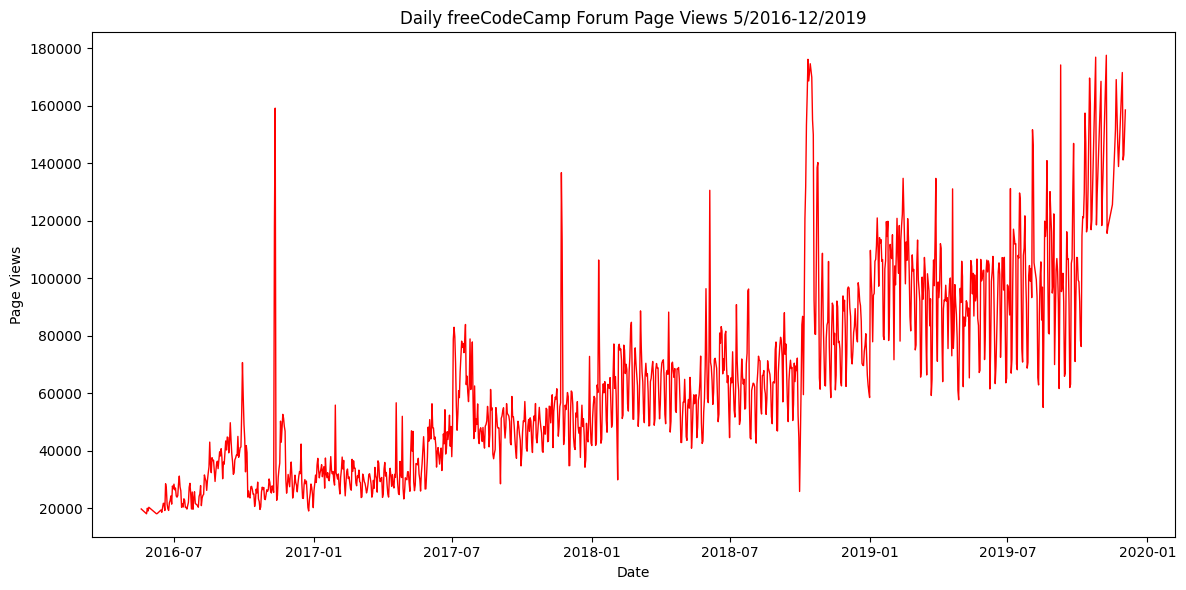

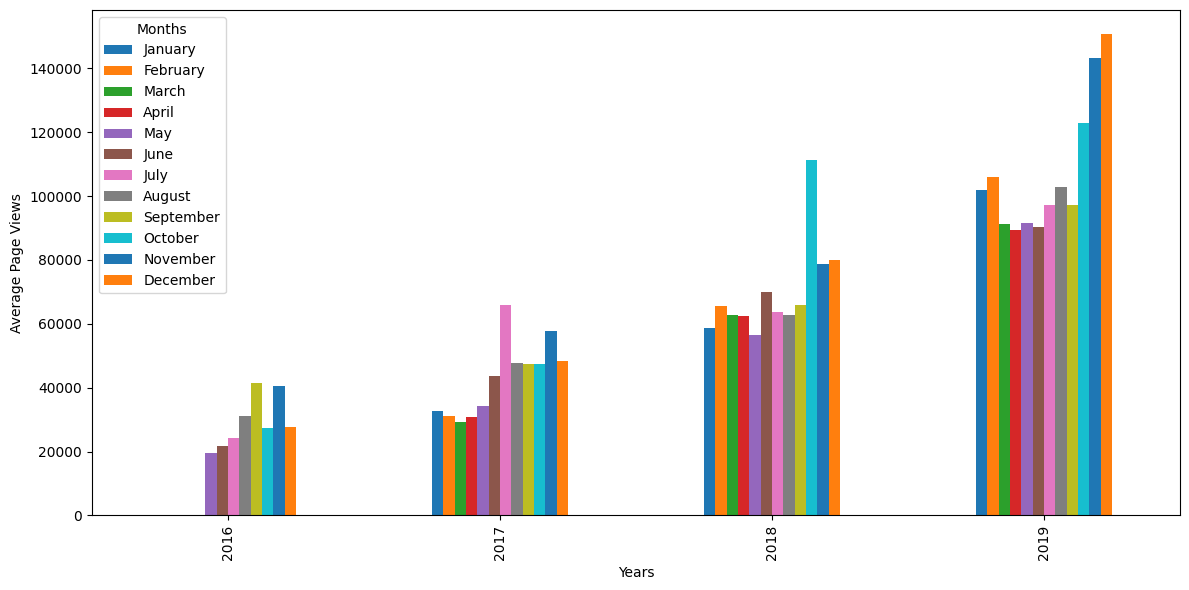

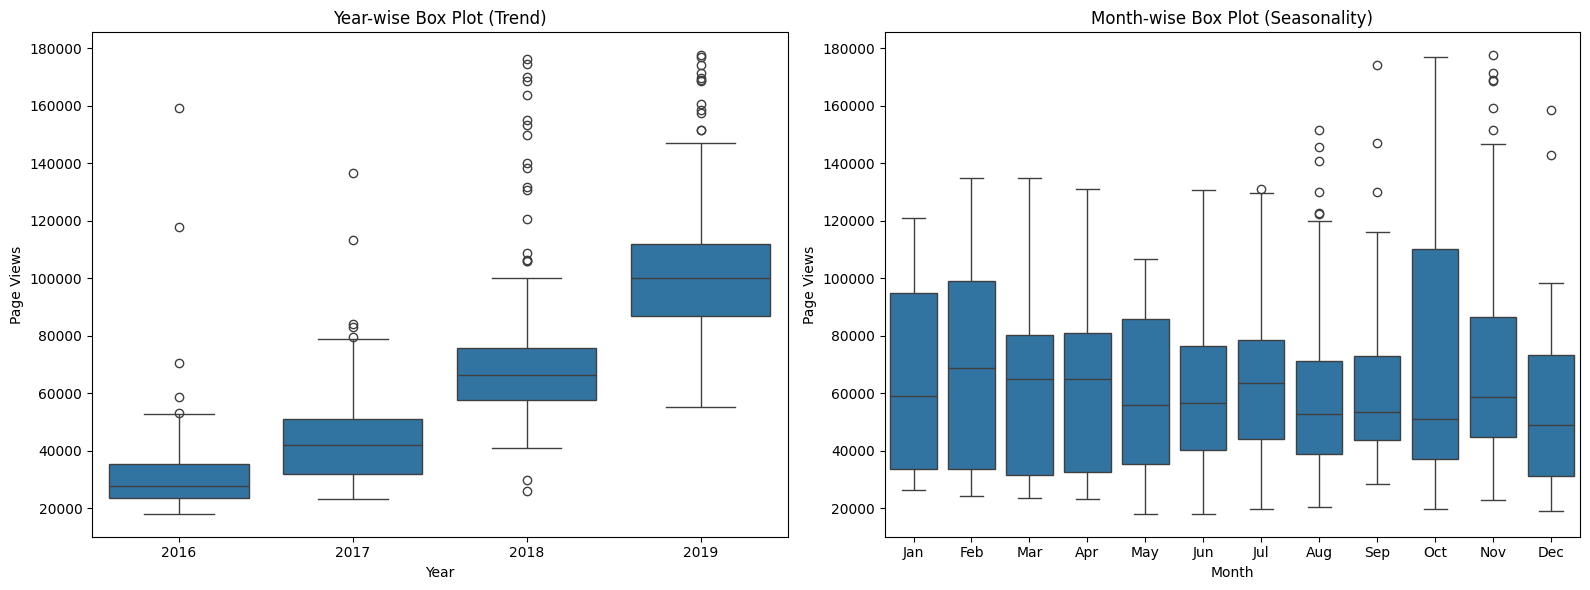

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/fcc-forum-pageviews.csv'
df = pd.read_csv(file_path, index_col='date', parse_dates=True)

# Clean the data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

# Draw Line Plot
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.tight_layout()
    return fig

# Draw Bar Plot
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df.index.year
    df_bar['month'] = df.index.month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    fig = df_bar.plot(kind='bar', figsize=(12, 6), legend=True).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=[
        'January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December'
    ])
    plt.tight_layout()
    return fig

# Draw Box Plot
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(ax=axes[0], x='year', y='value', data=df_box)
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(ax=axes[1], x='month', y='value', data=df_box, order=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()
    return fig

# Generate the visualizations
line_plot = draw_line_plot()
bar_plot = draw_bar_plot()
box_plot = draw_box_plot()
